# Purpose:
- This notebook explores a movies metadata dataset which will be used to build a prediction model for movie revenue; the notebook starts with the original dataset and ends with the clean dataset that will be used to train the model
- __[Original dataset on Kaggle](https://www.kaggle.com/rounakbanik/the-movies-dataset/data)__

In [1]:
#loading necessary packages
import csv
import numpy as np
import math
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import random
import datetime

%matplotlib inline

## Part I: Loading & Processing Data

In [2]:
def get_data(ext,file_name):
    data = pd.read_csv(ext + file_name)
    return data

In [3]:
# reading in the data
movies = get_data('../','movies_metadata.csv')

/Users/veronicahsieh/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Original data set has 24 columns and 45,466 movies

In [4]:
movies.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
movies.shape

(45466, 24)

### Data Cleaning & Manipulation

In [6]:
#all columns from raw data
movies.columns.values.tolist()

['adult',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'video',
 'vote_average',
 'vote_count']

### <font color = PaleVioletRed >**Function | ** </font> drop_columns()

In [7]:
def drop_columns(frame,col_list):
    new_frame = frame.drop(col_list, axis = 1)
    return new_frame

> takes the dataframe and list of columns to drop; returns a new dataframe
<br>
columns to drop: <br>['adult','belongs_to_collection','homepage','original_language','overview','poster_path','production_companies','production_countries','spoken_languages','status','tagline','video']

In [8]:
rem_list = ['adult','belongs_to_collection','homepage','original_language','overview','poster_path','production_companies','production_countries','spoken_languages','status','tagline','video']

In [9]:
movies_v1 = drop_columns(movies,rem_list)
movies_v1.head()

,budget,genres,id,imdb_id,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,Toy Story,21.9469,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,Jumanji,17.0155,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,Grumpier Old Men,11.7129,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,Waiting to Exhale,3.85949,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Father of the Bride Part II,8.38752,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0


After dropping unecessary data, dataframe now has 12 columns

In [10]:
movies_v1.shape

(45466, 12)

### <font color = PaleVioletRed >**Function | ** </font> clean_genre()

In [11]:
def clean_genre(frame,orig_col,new_col):
    frame[new_col] = frame[orig_col].str.split(',').apply(lambda x: x[0].split(',')[0][7:])
    return frame

> uses the genre column from the original dataframe and returns
<br> a cleaned up version...name of new column can be specified 

In [12]:
clean_genre(movies_v1,orig_col = 'genres',new_col = 'genre1').head()

,budget,genres,id,imdb_id,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genre1
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,Toy Story,21.9469,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,16
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,Jumanji,17.0155,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,12
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,Grumpier Old Men,11.7129,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,10749
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,Waiting to Exhale,3.85949,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,35
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Father of the Bride Part II,8.38752,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,35


In [13]:
movies_v1.genre1.nunique() #there are 24 unique genres in this dataset

24

### <font color = PaleVioletRed >**Function | ** </font> get_release_year()

In [14]:
def get_release_year(frame):
    frame['release_year'] = pd.to_numeric(frame.release_date.str.slice(0,4),errors = 'coerce')
    return frame

> takes the release date from the original movie dataframe and creates a new column which extracts just the year for each movie

In [15]:
get_release_year(movies_v1)

,budget,genres,id,imdb_id,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genre1,release_year
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,Toy Story,21.9469,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,16,1995.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,Jumanji,17.0155,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,12,1995.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,Grumpier Old Men,11.7129,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,10749,1995.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,Waiting to Exhale,3.85949,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,35,1995.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Father of the Bride Part II,8.38752,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,35,1995.0
5,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,Heat,17.9249,1995-12-15,187436818.0,170.0,Heat,7.7,1886.0,28,1995.0
6,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",11860,tt0114319,Sabrina,6.67728,1995-12-15,0.0,127.0,Sabrina,6.2,141.0,35,1995.0
7,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",45325,tt0112302,Tom and Huck,2.56116,1995-12-22,0.0,97.0,Tom and Huck,5.4,45.0,28,1995.0
8,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,tt0114576,Sudden Death,5.23158,1995-12-22,64350171.0,106.0,Sudden Death,5.5,174.0,28,1995.0
9,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,tt0113189,GoldenEye,14.686,1995-11-16,352194034.0,130.0,GoldenEye,6.6,1194.0,12,1995.0


### <font color = PaleVioletRed >**Function | ** </font> conv_to_numeric()

In [16]:
def conv_to_numeric(frame):
    frame['popularity'] = pd.to_numeric(frame.popularity,errors = 'coerce')
    frame['revenue'] = pd.to_numeric(movies.revenue, errors = 'coerce')
    frame['budget'] = pd.to_numeric(movies.budget, errors = 'coerce')
    return frame

> raw movie dataframe contains all string values; takes the movie dataframe and converts all columns which should be numeric

In [17]:
conv_to_numeric(movies_v1)

,budget,genres,id,imdb_id,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genre1,release_year
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,16,1995.0
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,Jumanji,17.015539,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,12,1995.0
2,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,Grumpier Old Men,11.712900,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,10749,1995.0
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,Waiting to Exhale,3.859495,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,35,1995.0
4,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Father of the Bride Part II,8.387519,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,35,1995.0
5,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,Heat,17.924927,1995-12-15,187436818.0,170.0,Heat,7.7,1886.0,28,1995.0
6,58000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",11860,tt0114319,Sabrina,6.677277,1995-12-15,0.0,127.0,Sabrina,6.2,141.0,35,1995.0
7,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",45325,tt0112302,Tom and Huck,2.561161,1995-12-22,0.0,97.0,Tom and Huck,5.4,45.0,28,1995.0
8,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,tt0114576,Sudden Death,5.231580,1995-12-22,64350171.0,106.0,Sudden Death,5.5,174.0,28,1995.0
9,58000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,tt0113189,GoldenEye,14.686036,1995-11-16,352194034.0,130.0,GoldenEye,6.6,1194.0,12,1995.0


### <font color = PaleVioletRed >**Function | ** </font> release_timespan()

In [18]:
def release_timespan(frame):
    frame['release_timespan'] = datetime.datetime.now().year - frame['release_year']

In [19]:
movies_v1['release_timespan'] = datetime.datetime.now().year - movies_v1['release_year']
movies_v1.head(1)

,budget,genres,id,imdb_id,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genre1,release_year,release_timespan
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,16,1995.0,23.0


> Creating a new column in the dataframe that measures time between current year and release year of the movie

### <font color='DarkMagenta'>Popularity</font> column

In [20]:
def shift_pop(frame):
    frame.popularity[frame.popularity == 0] = 1
    return frame

In [21]:
shift_pop(movies_v1)

/Users/veronicahsieh/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,budget,genres,id,imdb_id,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genre1,release_year,release_timespan
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,16,1995.0,23.0
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,Jumanji,17.015539,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,12,1995.0,23.0
2,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,Grumpier Old Men,11.712900,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,10749,1995.0,23.0
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,Waiting to Exhale,3.859495,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,35,1995.0,23.0
4,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Father of the Bride Part II,8.387519,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,35,1995.0,23.0
5,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,Heat,17.924927,1995-12-15,187436818.0,170.0,Heat,7.7,1886.0,28,1995.0,23.0
6,58000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",11860,tt0114319,Sabrina,6.677277,1995-12-15,0.0,127.0,Sabrina,6.2,141.0,35,1995.0,23.0
7,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",45325,tt0112302,Tom and Huck,2.561161,1995-12-22,0.0,97.0,Tom and Huck,5.4,45.0,28,1995.0,23.0
8,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,tt0114576,Sudden Death,5.231580,1995-12-22,64350171.0,106.0,Sudden Death,5.5,174.0,28,1995.0,23.0
9,58000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,tt0113189,GoldenEye,14.686036,1995-11-16,352194034.0,130.0,GoldenEye,6.6,1194.0,12,1995.0,23.0


> Adds 1 to all movies whose popularity is 0...this is to avoid error 
<br> when taking the log transformation of popularity in the next function

### <font color = PaleVioletRed >**Function | ** </font> scale_pop()

In [22]:
def scale_pop(frame,orig_col,new_col):
    frame[new_col] = np.log(frame[orig_col])
    return frame

In [23]:
scale_pop(movies_v1,'popularity','popularity_scaled')
movies_v1.head(5)

,budget,genres,id,imdb_id,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genre1,release_year,release_timespan,popularity_scaled
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,16,1995.0,23.0,3.088628
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,Jumanji,17.015539,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,12,1995.0,23.0,2.834127
2,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,Grumpier Old Men,11.712900,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,10749,1995.0,23.0,2.460691
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,Waiting to Exhale,3.859495,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,35,1995.0,23.0,1.350536
4,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Father of the Bride Part II,8.387519,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,35,1995.0,23.0,2.126745


> creates a new predictor which is the log transformation 
<br>of the popularity column...will be used as a feature variable for the model

Verifying that each column is the correct data format

In [24]:
movies_v1.dtypes

budget               float64
genres                object
id                    object
imdb_id               object
original_title        object
popularity           float64
release_date          object
revenue              float64
runtime              float64
title                 object
vote_average         float64
vote_count           float64
genre1                object
release_year         float64
release_timespan     float64
popularity_scaled    float64
dtype: object

### Exploratory Data Analysis 

### <font color='DarkMagenta'>Genre</font> values

Since the first 3 genre types only have 1 movie associated with them, they will be dropped from the data set

In [25]:
movies_v1['genre1'].value_counts().sort_values()

': 'Aniplex'                     1
': 'Odyssey Media'               1
': 'Carousel Productions'        1
 10769                         118
 36                            279
 10752                         379
 10770                         390
 37                            451
 10402                         487
 10751                         524
 9648                          554
 878                           647
 14                            704
 16                           1124
 10749                        1191
 12                           1514
 53                           1665
 80                           1685
                              2442
 27                           2619
 99                           3415
 28                           4489
 35                           8820
 18                          11966
Name: genre1, dtype: int64

In [26]:
# looking for missing values in each column
movies_v1.isnull().sum()

budget                 3
genres                 0
id                     0
imdb_id               17
original_title         0
popularity             6
release_date          87
revenue                6
runtime              263
title                  6
vote_average           6
vote_count             6
genre1                 0
release_year          87
release_timespan      87
popularity_scaled      6
dtype: int64

### <font color='DarkMagenta'>Building the training set</font>

In [27]:
# working off a new copy of the cleaned up data frame to build the training set
movies_v2 = movies_v1.copy() 

In [28]:
movies_v2.shape

(45466, 16)

### <font color = PaleVioletRed >**Function | ** </font> remove_empty()

In [40]:
def remove_empty(frame):
    frame = frame[frame.revenue != 0]
    frame = frame[frame.budget != 0]
    frame = frame[frame.genre1 != ""]
    new_frame = frame.dropna(subset=['revenue','vote_average','budget','runtime','release_year'])
    new_frame = frame.reset_index()
    return new_frame    

> Remove all observations where the revenue, voting average, budget, runtime, and release columns are 0 or N/A

In [41]:
movies_v3 = remove_empty(movies_v2)

In [42]:
movies_v3.shape

(5372, 17)

In [44]:
movies_v3.reset_index().head()

,level_0,index,budget,genres,id,imdb_id,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genre1,release_year,release_timespan,popularity_scaled
0,0,0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,16,1995.0,23.0,3.088628
1,1,1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,Jumanji,17.015539,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,12,1995.0,23.0,2.834127
2,2,3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,Waiting to Exhale,3.859495,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,35,1995.0,23.0,1.350536
3,3,5,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,Heat,17.924927,1995-12-15,187436818.0,170.0,Heat,7.7,1886.0,28,1995.0,23.0,2.886192
4,4,8,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,tt0114576,Sudden Death,5.231580,1995-12-22,64350171.0,106.0,Sudden Death,5.5,174.0,28,1995.0,23.0,1.654713


Creating dummy variables for each movie genre

In [32]:
def make_genre_dummy(frame,genre_col):
    genre_factor = pd.get_dummies(frame[genre_col])
    return genre_factor

In [33]:
movies_test = movies_v2.copy()
movies_test.head()

,budget,genres,id,imdb_id,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genre1,release_year,release_timespan,popularity_scaled
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,16,1995.0,23.0,3.088628
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,Jumanji,17.015539,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,12,1995.0,23.0,2.834127
2,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,Grumpier Old Men,11.712900,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,10749,1995.0,23.0,2.460691
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,Waiting to Exhale,3.859495,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,35,1995.0,23.0,1.350536
4,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Father of the Bride Part II,8.387519,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,35,1995.0,23.0,2.126745


In [35]:
a = make_genre_dummy(movies_test,'genre1').reset_index()
a.head()

,index,,10402,10749,10751,10752,10769,10770,12,14,...,36,37,53,80,878,9648,99,': 'Aniplex',': 'Carousel Productions',': 'Odyssey Media'
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
genre_factor = pd.get_dummies(movies_v3['genre1'])
genre_factor.head()
#names(genre_factor)

,10402,10749,10751,10752,10769,10770,12,14,16,18,...,36,37,53,80,878,9648,99,': 'Aniplex',': 'Carousel Productions',': 'Odyssey Media'
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Merging the dummy variables dataframe back to the existing movie dataframe

In [37]:
def merge_dummies(frame1,frame2):
    movies_data = pd.merge(frame1,frame2, left_index = True, right_index = True)
    return movies_data

In [38]:
b = merge_dummies(movies_v3,a)
b.head()

,index_x,budget,genres,id,imdb_id,original_title,popularity,release_date,revenue,runtime,...,36,37,53,80,878,9648,99,': 'Aniplex',': 'Carousel Productions',': 'Odyssey Media'
0,0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,Toy Story,21.946943,1995-10-30,373554033.0,81.0,...,0,0,0,0,0,0,0,0,0,0
1,1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,Jumanji,17.015539,1995-12-15,262797249.0,104.0,...,0,0,0,0,0,0,0,0,0,0
2,3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,Waiting to Exhale,3.859495,1995-12-22,81452156.0,127.0,...,0,0,0,0,0,0,0,0,0,0
3,5,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,Heat,17.924927,1995-12-15,187436818.0,170.0,...,0,0,0,0,0,0,0,0,0,0
4,8,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,tt0114576,Sudden Death,5.231580,1995-12-22,64350171.0,106.0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
movies_v4 = pd.merge(movies_v3, genre_factor,left_index=True,right_index = True)
movies_v4.head()

,index,budget,genres,id,imdb_id,original_title,popularity,release_date,revenue,runtime,...,36,37,53,80,878,9648,99,': 'Aniplex',': 'Carousel Productions',': 'Odyssey Media'
0,0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,Toy Story,21.946943,1995-10-30,373554033.0,81.0,...,0,0,0,0,0,0,0,0,0,0
1,1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,Jumanji,17.015539,1995-12-15,262797249.0,104.0,...,0,0,0,0,0,0,0,0,0,0
2,3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,Waiting to Exhale,3.859495,1995-12-22,81452156.0,127.0,...,0,0,0,0,0,0,0,0,0,0
3,5,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,Heat,17.924927,1995-12-15,187436818.0,170.0,...,0,0,0,0,0,0,0,0,0,0
4,8,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,tt0114576,Sudden Death,5.231580,1995-12-22,64350171.0,106.0,...,0,0,0,0,0,0,0,0,0,0


New dataframe with only feature variables

In [146]:
movies_v5 = movies_v4.drop(['index','genre1','release_year','genres','id','title','release_date','imdb_id','original_title','popularity','vote_count',"': 'Aniplex'","': 'Carousel Productions'","': 'Odyssey Media'"], axis=1)

In [147]:
movies_v5.head()

,budget,revenue,runtime,vote_average,release_timespan,popularity_scaled,10402,10749,10751,10752,...,27,28,35,36,37,53,80,878,9648,99
0,30000000.0,373554033.0,81.0,7.7,23.0,3.088628,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,65000000.0,262797249.0,104.0,6.9,23.0,2.834127,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16000000.0,81452156.0,127.0,6.1,23.0,1.350536,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,60000000.0,187436818.0,170.0,7.7,23.0,2.886192,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,35000000.0,64350171.0,106.0,5.5,23.0,1.654713,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Training set has approximately 5000 observations and 6 feature variables 

In [150]:
movies_v5.shape

(5372, 26)

In [151]:
movies_v5.to_csv("movies_v5.csv",index = False)

### <font color='MediumOrchid'>Other related notebooks:</font>
- **Movies Revenue Prediction - Model Development:** this notebook contains the training of the decision tree model that will be executed on the web application
- **Movie genre mapping:** function that returns the dummy variable code based on the genre name
- **Build prediction frame:** function that builds a dataframe which can be used as input to make new movie revenue predictions

### <font color='MediumOrchid'>Creating a dictionary to map user input to genre dummy</font>

In [110]:
import csv

In [130]:
def make_genres_map(dict, filepath):
    genre_file = open(filepath)
    genre_reader = csv.reader(genre_file)
    next(genre_reader)
    for row in genre_reader:
        dict.update({row[1]:row[0]}) 
    return genres_map

In [132]:
genres_map = {}
a = make_genres_map(genres_map,"genres_map.csv")
a

{'Action': '28',
 'Adventure': '12',
 'Animation': '16',
 'Comedy': '35',
 'Crime': '80',
 'Documentary': '99',
 'Drama': '18',
 'Family': '10751',
 'Fantasy': '14',
 'Foreign': '10769',
 'History': '36',
 'Horror': '27',
 'Music': '10402',
 'Mystery': '9648',
 'Romance': '10749',
 'Science Fiction': '878',
 'TV Movie': '10770',
 'Thriller': '53',
 'War': '10752',
 'Western': '37'}

In [111]:
genres_map = {}
genre_file = open("genres_map.csv")
genre_reader = csv.reader(genre_file)
next(genre_reader)
for row in genre_reader:
    genres_map.update({row[1]:row[0]}) 

In [112]:
genres_map

{'Action': '28',
 'Adventure': '12',
 'Animation': '16',
 'Comedy': '35',
 'Crime': '80',
 'Documentary': '99',
 'Drama': '18',
 'Family': '10751',
 'Fantasy': '14',
 'Foreign': '10769',
 'History': '36',
 'Horror': '27',
 'Music': '10402',
 'Mystery': '9648',
 'Romance': '10749',
 'Science Fiction': '878',
 'TV Movie': '10770',
 'Thriller': '53',
 'War': '10752',
 'Western': '37'}

In [85]:
movies_train.head()

,budget,revenue,runtime,vote_average,release_timespan,popularity_scaled,10402,10749,10751,10752,...,27,28,35,36,37,53,80,878,9648,99
3816,3200000.0,5332926.0,105.0,6.8,8.0,1.906039,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3377,15000000.0,35097815.0,92.0,6.8,9.0,2.189455,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3120,85000000.0,222231186.0,88.0,5.9,10.0,2.401432,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
635,70000000.0,164000000.0,98.0,5.6,20.0,2.908224,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1949,30000000.0,33013805.0,113.0,6.6,16.0,2.427549,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [87]:
X = movies_train[['budget','runtime','vote_average','release_timespan','popularity_scaled',
 ' 10402',' 10749',' 10751',' 10752',' 10769',' 10770',' 12',' 14',' 16',' 18',' 27',' 28',' 35',' 36',' 37',
 ' 53',' 80',' 878',' 9648',' 99']]
y = movies_train['revenue']

In [88]:
X_test = movies_test[['budget','runtime','vote_average','release_timespan','popularity_scaled',' 10402',' 10749',
 ' 10751',' 10752',' 10769',' 10770',' 12',' 14',' 16',' 18',' 27',' 28',' 35',' 36',' 37',' 53',' 80',' 878',' 9648',' 99']]
y_test = movies_test['revenue']

In [89]:
movies_treefit = DecisionTreeRegressor(max_depth = 8,min_samples_leaf = 7)
movies_treefit = movies_treefit.fit(X,y)

In [92]:
#training R-squared
y_true = movies_train['revenue']
y_pred = movies_treefit.predict(X)
train_rsquared = r2_score(y_true, y_pred) 
train_rsquared

0.78461298707190541

In [93]:
#test R-squared
y_true_test = movies_test['revenue']
y_pred_test = movies_treefit.predict(X_test)
test_rsquared = r2_score(y_true_test, y_pred_test)
test_rsquared

0.56579218187532365

In [113]:
def get_genre_code(genre):
    code = genres_map.get(genre)
    return code

In [114]:
get_genre_code('Documentary')

'99'

In [116]:
def build_pred_frame(genre_code,year,runtime,popularity,rating,budget):
    col_names = ['budget','popularity','runtime','vote_average','release_timespan','popularity_scaled',
 ' 10402',' 10749',' 10751',' 10752',' 10769',' 10770',' 12',' 14',' 16',' 18',' 27',' 28',' 35',' 36',' 37',
 ' 53',' 80',' 878',' 9648',' 99']
    release_timespan = datetime.datetime.now().year - year
    new_frame = pd.DataFrame([[budget,popularity,runtime,rating,release_timespan,popularity,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]],columns=col_names)
    new_frame[" "+ genre_code] = 1
    return new_frame

In [119]:
a = build_pred_frame('10402',2010,340,8,4.5,300000)
a

,budget,popularity,runtime,vote_average,release_timespan,popularity_scaled,10402,10749,10751,10752,...,27,28,35,36,37,53,80,878,9648,99
0,300000,8,340,4.5,8,8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Saving Decision Tree Model

In [120]:
import pickle

In [ ]:
#create pickle files
   joblib.dump(movies_treefit, 've.pkl')
   joblib.dump(classifier, 'cl.pkl')

#load pickle vectorizer & classifier
   vect = joblib.load('ve.pkl')
   classifier = joblib.load('cl.pkl')

In [123]:
movie_model_path = 'movie_tree.pkl'
 
# Create an variable to pickle and open it in write mode
model_pickle = open(movie_model_path, 'wb')
pickle.dump(movies_treefit, model_pickle)
model_pickle.close()

### Previous Models

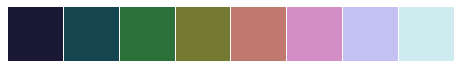

In [29]:
sns.palplot(sns.color_palette("cubehelix", 8))

/Users/veronicahsieh/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/veronicahsieh/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


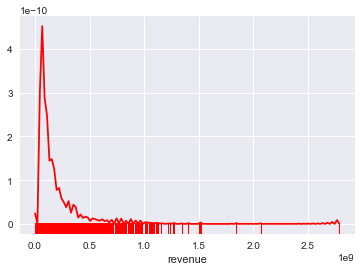

In [28]:
revenue_dist = movies['revenue']
sns.distplot(revenue_dist, hist=False, rug=True, color="r")

## Most popular genres in the movie set 
* Drama - (18)
* Comedy - (35)
* Action - (28)
* Documentary - (99)
* Horror - (27)

In [104]:
genre_count = movies.genre1.value_counts().head()
genre_count

 18    11966
 35     8820
 28     4489
 99     3415
 27     2619
Name: genre1, dtype: int64

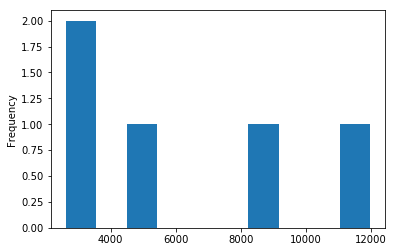

In [108]:
genre_names =['drama','horror','action','comedy','documentary']
genre_count.plot(kind='hist',x = 'genre', y = 'count',use_index = False)

In [123]:
release_year_count.head()

,release_year
2014.0,1974
2015.0,1905
2013.0,1889
2012.0,1722
2011.0,1667


In [128]:
release_year_count = pd.DataFrame(movies.release_year.value_counts()).rename(columns = {'release_year': 'count'})
release_year_count.sort_values('count',ascending = False).head()

,count
2014.0,1974
2015.0,1905
2013.0,1889
2012.0,1722
2011.0,1667


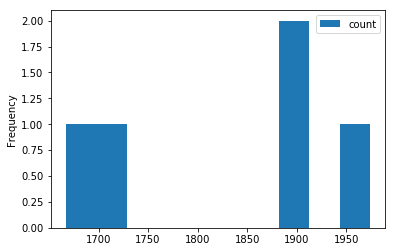

In [132]:
top_release_year = release_year_count.head()
top_release_year.plot(kind='hist',use_index = True)

## Part II: Modeling

### First iteration of Gaussian mixture model

To test out the Gaussian mixture model, I start out by only using 3 feature variables: 
* budget
* revenue
* release_year

For this analysis, I purposely left budget and revenue as separate variables instead of combining them into a "profit" variable. This is because I think there are inherent differences between two movies that both have high profits (e.g. one with extremely high revenue + medium cost vs medium/high revenue + extremely low cost)

In [68]:
from sklearn import mixture
import numpy as np

In [65]:
# new data frame with only features used for Gaussian mixture
cluster_data = movies[['budget','revenue','release_year']]
cluster_data.head()

,budget,revenue,release_year
0,30000000.0,373554033.0,1995.0
1,65000000.0,262797249.0,1995.0
2,0.0,0.0,1995.0
3,16000000.0,81452156.0,1995.0
4,0.0,76578911.0,1995.0


In [84]:
# taking a sample from data set to create clusers
random.seed(3)
cluster_train = cluster_data.sample(100)

In [87]:
# fitting a 2-component Gaussian mixture model to my sample
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(cluster_train)
train_prob = pd.DataFrame(clf.predict_proba(cluster_train))
train_prob.head()
cluster_count = clf.predict(cluster_train)
cluster_count # predicted cluster for each observation in my sample

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [89]:
# predict_proba shows the probability of each observation being in a cluster
train_prob.head()

,0,1
0,1.000000e+00,0.0
1,1.000000e+00,0.0
2,1.000000e+00,0.0
3,1.352104e-210,1.0
4,1.000000e+00,0.0


### Next Iteration of Model
* investigate taking log transformations of revenue, budget variables
* incorporate new variables such as popularity
* decide whether genre should be used as a feature variable or initial filtering mechanism
* experiment with different cluster sizes and bigger sample